### Purpose of this Project

+ Freedom has run a recent Marketing campaign promoting their value propositon
+ The total cost of this campagin was $5 million
+ There are five months of data provided, with the campaign occurring on the third month
+ It is now our turn to present to Marketing, Sales & Operations whether this campaign was successful or not

### This notebook will contain..

+ Data exploration and a quantitative assessment of the campaign's performance
  - Outlining which metrics were chosen and why
  - Recommendations for company strategy to improve future campaign performance

In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# loading the first dataset - client data
client_data = pd.read_csv('data/client_data.csv')

# displaying ten random samples from the dataset
client_data.sample(n = 10, random_state = 42)

,client_id,client_geographical_region,client_residence_status,client_age
6065,686872246977897,West,Own,35
28070,470518677565299,South,Rent,56
6936,883739117234218,South,Own,36
23158,822713875250308,South,Own,52
25506,442404955135328,South,Rent,53
28636,631431542327134,West,Own,56
12027,150678144870429,South,Rent,41
10827,521971892376941,South,Own,40
12010,769453548675001,West,Own,41
10936,627255228194699,West,Own,40


In [2]:
# looking at and understanding the data types and columns in the client dataset
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46347 entries, 0 to 46346
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   client_id                   46347 non-null  int64 
 1   client_geographical_region  46347 non-null  object
 2   client_residence_status     46347 non-null  object
 3   client_age                  46347 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [3]:
# loading in the second dataset - deposit data
deposit_data = pd.read_csv('data/deposit_data.csv')

# displaying ten random samples from the dataset
deposit_data.sample(n = 10, random_state = 42)

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
229803,903285839400111,Scheduled Deposit,458.0,Monthly,2019-08-16
92181,19473282206850,Scheduled Deposit,334.0,Monthly,2019-10-08
284306,240342552445691,Actual Deposit,500.0,Biweekly,2019-10-14
117592,503016878166122,Scheduled Deposit,30.0,Biweekly,2019-07-03
453913,774929593989542,Scheduled Deposit,476.0,Monthly,2019-09-30
427363,745708866884363,Scheduled Deposit,121.0,Biweekly,2019-09-18
90436,377197113377463,Scheduled Deposit,484.0,Monthly,2019-10-18
391277,87877453117377,Actual Deposit,271.0,Biweekly,2019-09-06
417793,405758738732483,Scheduled Deposit,170.0,Biweekly,2019-09-16
454206,584109001324997,Scheduled Deposit,344.0,Monthly,2019-09-30


In [4]:
# looking at and understanding the data types and columns in the deposit dataset
deposit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480394 entries, 0 to 480393
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   client_id        480394 non-null  int64  
 1   deposit_type     480394 non-null  object 
 2   deposit_amount   480394 non-null  float64
 3   deposit_cadence  480394 non-null  object 
 4   deposit_date     480394 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.3+ MB


In [5]:
# loading the third dataset - calendar data
calendar_data = pd.read_csv('data/calendar_data.csv')

# displaying ten random samples from the dataset
calendar_data.sample(n = 10, random_state = 42)

,gregorian_date,month_name
84,2019-08-24,Month 3
86,2019-08-26,Month 3
97,2019-09-06,Month 4
115,2019-09-24,Month 4
29,2019-06-30,Month 1
114,2019-09-23,Month 4
78,2019-08-18,Month 3
81,2019-08-21,Month 3
18,2019-06-19,Month 1
15,2019-06-16,Month 1


In [6]:
# looking at and understanding the data types and columns in the calendar dataset
calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gregorian_date  153 non-null    object
 1   month_name      153 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [7]:
# merging the client and deposit data  on the client_id
df = client_data.merge(deposit_data, on = 'client_id')

In [8]:
# merging the calendar data
df = df.merge(calendar_data, how = 'left', left_on = 'deposit_date', right_on = 'gregorian_date', copy = False)

# dropping the gregorian date column
df = df.drop(columns = 'gregorian_date')

# displaying a random sample
df.sample(n = 10, random_state = 42)

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
229803,785857299278044,Northeast,Own,50,Actual Deposit,206.0,Biweekly,2019-10-20,Month 5
92181,863421829222010,West,Own,38,Scheduled Deposit,628.0,Monthly,2019-07-30,Month 2
284306,490229169616749,West,Own,55,Scheduled Deposit,121.0,Biweekly,2019-07-11,Month 2
117592,708243207406045,West,Rent,40,Scheduled Deposit,706.0,Monthly,2019-08-02,Month 3
453913,38088639566247,Northeast,Own,73,Actual Deposit,398.0,Monthly,2019-08-15,Month 3
427363,253451236144307,West,Own,69,Actual Deposit,600.0,Extra,2019-06-22,Month 1
90436,138146421326438,South,Own,38,Actual Deposit,982.0,Monthly,2019-09-16,Month 4
391277,357249266343996,South,Own,64,Actual Deposit,199.0,Biweekly,2019-07-19,Month 2
417793,989835480580028,South,Own,67,Actual Deposit,389.0,Biweekly,2019-09-18,Month 4
454206,657010099818145,South,Rent,73,Actual Deposit,214.0,Monthly,2019-07-20,Month 2


### Exploring the dataset

+ Understand the columns in the dataset
+ Questions that come to mind:
1. How many regions are there and is the data balanced or imbalanced?
2. How many different resident statuses are there, and what does that distribution look like?
3. Distribution of age in the dataset
4. Financials by age, average deposit amount? Resident status by age?
5. Distribution of days by month (How many days in each month)

In [9]:
# taking a deeper dive into the regions and the distribution, using the .value_counts() function
df['client_geographical_region'].value_counts()

West         205629
South        108004
Midwest       88185
Northeast     78576
Name: client_geographical_region, dtype: int64

In [10]:
# understanding the distribution of resident status
df['client_residence_status'].value_counts()

Own     345432
Rent    134962
Name: client_residence_status, dtype: int64

In [11]:
# looking at the age distribution in the dataset, let's look at the minimum age
min_age = df['client_age'].min()

# now looking for the max client age in the dataset
max_age = df['client_age'].max()

# printing out statement identifying the min and max age
print(f"The youngest clients in the dataset are {min_age} years old, while the eldest is {max_age} years old")

The youngest clients in the dataset are 21 years old, while the eldest is 105 years old


### About the client ages

+ Create a visual that shows the distribution of ages in the dataset
+ It is great that we know the youngest and eldest, but where are most clients in terms of age?

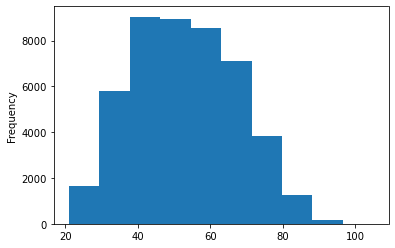

In [12]:
# creating a visual to understand the age distribution in the dataset
age_dist = client_data['client_age'].plot(kind = 'hist')

### Key takeaway from the histogram

+ Most clients in the dataset are between the ages 40 to 70

### Next...

+ Let's take a look at the distribution of days across the 5 months of data
+ Are they all 30 days? Are there any 28 or 31?

### After that

+ The type of candence of the deposits are also categorial
+ Therefore, there is a high chance we will be doing some grouping or plots around them
+ There are two deposit types, actual and scheduled - we will need to understand that distribution
+ There are three different types of deposit cadences: monthly, biweekly, and extra - another area that we will need to explore the distribution

In [13]:
# looking at the calendar days distribution using the value_counts() function
calendar_data['month_name'].value_counts()

Month 2    31
Month 5    31
Month 3    31
Month 1    30
Month 4    30
Name: month_name, dtype: int64

In [14]:
# getting the earliest date in the dataset
min_date = df['deposit_date'].min()

# getting the latest date in the dataset
max_date = df['deposit_date'].max()

# printing out statement including both min and max date
print(f"The dataset ranges from {min_date} to {max_date}")

The dataset ranges from 2019-06-01 to 2019-10-31
